<font color='red' size='+4'><b>Transfer learning using VGG16</b></font>


Given that we don't have access to more images, one way to achieve better performance would be to employ transfer learning techniques. There are several CNNs that have been trained on extensive datasets (millions of images) and are excellent candidates for transfer learning. In this project, we have opted to utilize the VGG16 model.

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_vgg = ImageDataGenerator(rotation_range = 60,
                               horizontal_flip = True,
                               zoom_range = 0.3,
                               preprocessing_function=preprocess_input)


valid_vgg = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# Training set
train_set_vgg = train_vgg.flow_from_directory('/content/drive/MyDrive/Image Classification/train_valid_split/train',
                                          class_mode = 'categorical',
                                          seed=2222, target_size=(224, 224))

Found 3499 images belonging to 22 classes.


In [ ]:
# Validation set
valid_set_vgg = valid_vgg.flow_from_directory('/content/drive/MyDrive/Image Classification/train_valid_split/val',
                                          class_mode = 'categorical',
                                          seed=2222, target_size=(224, 224))

Found 885 images belonging to 22 classes.


<font color='purple' size='+3'><b>VGG16 and data augmentation techniques</b></font>

In [2]:
# Loading VGG16 model with its pre-trained weights
base_vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_vgg16.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# Top layers of the VGG16 base
pool = GlobalAveragePooling2D()
dense_layer1 = Dense(256, activation='relu')
drop2 = Dropout(0.1)
dense_layer2 = Dense(128, activation='relu')
last_layer = Dense(22, activation='softmax')



model_vgg = Sequential([
            base_vgg16,
            pool,
            dense_layer1,
            drop2,
            dense_layer2,
            last_layer
])

In [3]:
#Training will be stopped if there is no loss improvement after 5 consecutive epochs
cb = EarlyStopping(monitor='loss', patience=5)

In [ ]:
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training and validation history
his_vgg = model_vgg.fit(train_set_vgg, epochs = 10, validation_data = valid_set_vgg, callbacks = [cb])

Epoch 1/10
110/110 [==============================] - 2022s 18s/step - loss: 1.8139 - accuracy: 0.4581 - val_loss: 0.9044 - val_accuracy: 0.7130
Epoch 2/10
110/110 [==============================] - 634s 6s/step - loss: 0.8033 - accuracy: 0.7391 - val_loss: 0.6410 - val_accuracy: 0.7989
Epoch 3/10
110/110 [==============================] - 650s 6s/step - loss: 0.5764 - accuracy: 0.8065 - val_loss: 0.5634 - val_accuracy: 0.8203
Epoch 4/10
110/110 [==============================] - 589s 5s/step - loss: 0.4985 - accuracy: 0.8225 - val_loss: 0.4616 - val_accuracy: 0.8520
Epoch 5/10
110/110 [==============================] - 705s 6s/step - loss: 0.4548 - accuracy: 0.8485 - val_loss: 0.5060 - val_accuracy: 0.8282
Epoch 6/10
110/110 [==============================] - 601s 5s/step - loss: 0.4109 - accuracy: 0.8574 - val_loss: 0.4490 - val_accuracy: 0.8633
Epoch 7/10
110/110 [==============================] - 669s 6s/step - loss: 0.3854 - accuracy: 0.8620 - val_loss: 0.4623 - val_accuracy: 0.84

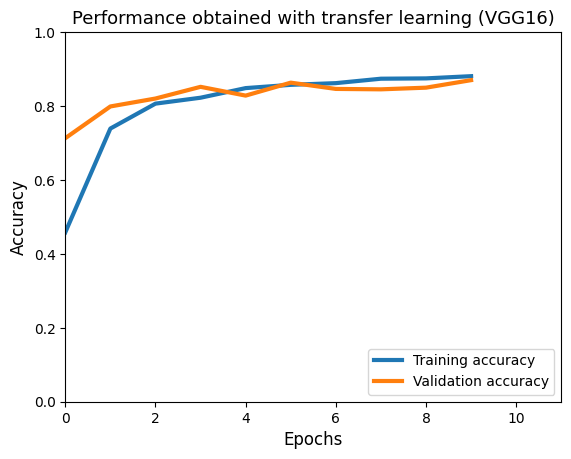

In [ ]:
plt.xlim(0,11)
plt.ylim(0,1)
plt.plot(his_vgg.history['accuracy'], label='Training accuracy', linewidth=3 )
plt.plot(his_vgg.history['val_accuracy'], label='Validation accuracy', linewidth=3)
plt.title("Performance obtained with transfer learning (VGG16)", fontsize = 13)
plt.ylabel('Accuracy',fontsize = 12)
plt.xlabel('Epochs', fontsize = 12)
plt.legend(loc='lower right')
plt.show()

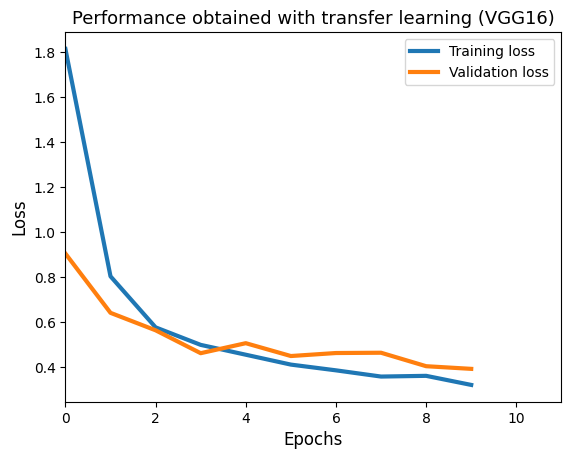

In [ ]:
plt.xlim(0,11)
plt.plot(his_vgg.history['loss'], label='Training loss', linewidth=3)
plt.plot(his_vgg.history['val_loss'], label='Validation loss', linewidth=3)
plt.title("Performance obtained with transfer learning (VGG16)", fontsize = 13)
plt.ylabel('Loss', fontsize = 12)
plt.xlabel('Epochs', fontsize = 12)
plt.legend()
plt.show()

The utilization of transfer learning has allowed us to achieve a 87% validation accuracy rate which is so far our best score. Moreover, the validation accuracy rate has remained quite stable during the learning process in contrast to what was observed with our baseline model. There is no noticeable gap between training and validation performance which is very encouraging.  


<font color='purple' size='+3'><b>Transfer learning combined with more complex data augmentation techniques and dropout regularization</b></font>

In [4]:
train_vgg2 = ImageDataGenerator(rotation_range = 60,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               horizontal_flip = True,
                               shear_range=0.2,
                               zoom_range=0.3,
                               preprocessing_function=preprocess_input)


valid_vgg2 = ImageDataGenerator(preprocessing_function=preprocess_input)

In [5]:
# Training set
train_set_vgg2 = train_vgg2.flow_from_directory('/content/drive/MyDrive/Image Classification/train_valid_split/train',
                                                class_mode = 'categorical',
                                                seed=2222, target_size=(224, 224))

Found 3499 images belonging to 22 classes.


In [6]:
# Validation set
valid_set_vgg2 = valid_vgg2.flow_from_directory('/content/drive/MyDrive/Image Classification/train_valid_split/val',
                                                class_mode = 'categorical',
                                                seed=2222, target_size=(224, 224))

Found 885 images belonging to 22 classes.


In [7]:
pool2 = GlobalAveragePooling2D()
dense = Dense(256, activation='relu')
drop_layer = Dropout(0.3)
dense2 = Dense(256, activation='relu')
output_layer = Dense(22, activation='softmax')


model_vgg2 = Sequential([base_vgg16,
                         pool2,
                         dense,
                         drop_layer,
                         dense2,
                         output_layer
])

In [8]:
model_vgg2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
his_vgg2 = model_vgg2.fit(train_set_vgg2, epochs = 10, validation_data = valid_set_vgg2, callbacks = [cb])

Epoch 1/10
110/110 [==============================] - 4673s 43s/step - loss: 1.9302 - accuracy: 0.4293 - val_loss: 0.8917 - val_accuracy: 0.7006
Epoch 2/10
110/110 [==============================] - 652s 6s/step - loss: 1.0030 - accuracy: 0.6853 - val_loss: 0.7497 - val_accuracy: 0.7548
Epoch 3/10
110/110 [==============================] - 680s 6s/step - loss: 0.7980 - accuracy: 0.7279 - val_loss: 0.5559 - val_accuracy: 0.8068
Epoch 4/10
110/110 [==============================] - 653s 6s/step - loss: 0.6607 - accuracy: 0.7665 - val_loss: 0.5347 - val_accuracy: 0.8147
Epoch 5/10
110/110 [==============================] - 708s 6s/step - loss: 0.6503 - accuracy: 0.7785 - val_loss: 0.5554 - val_accuracy: 0.8079
Epoch 6/10
110/110 [==============================] - 663s 6s/step - loss: 0.5641 - accuracy: 0.8062 - val_loss: 0.4616 - val_accuracy: 0.8554
Epoch 7/10
110/110 [==============================] - 650s 6s/step - loss: 0.5397 - accuracy: 0.8057 - val_loss: 0.6709 - val_accuracy: 0.78

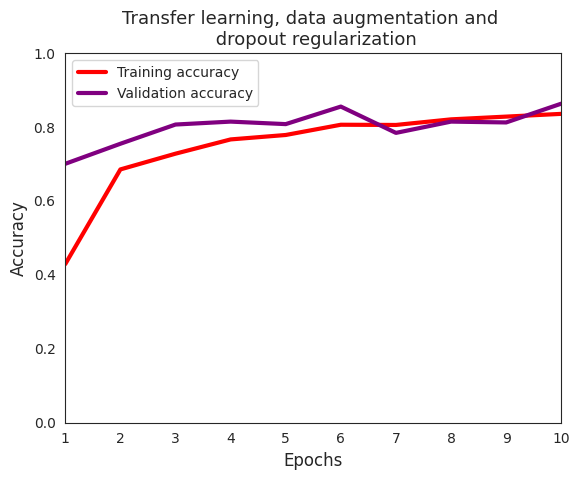

In [10]:
# Accuracy
sns.set_style('white')
sns.lineplot(x=range(1, len(his_vgg2.history['accuracy']) + 1), y = his_vgg2.history['accuracy'],
             label='Training accuracy', linewidth=3, color = 'red')
sns.lineplot(x=range(1, len(his_vgg2.history['val_accuracy']) + 1), y = his_vgg2.history['val_accuracy'],
             label='Validation accuracy', linewidth=3, color = 'purple')
plt.title("Transfer learning, data augmentation and \n dropout regularization", fontsize=13)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.xlim(1, len(his_vgg2.history['accuracy']))
plt.ylim(0, 1)
plt.legend()
plt.show()

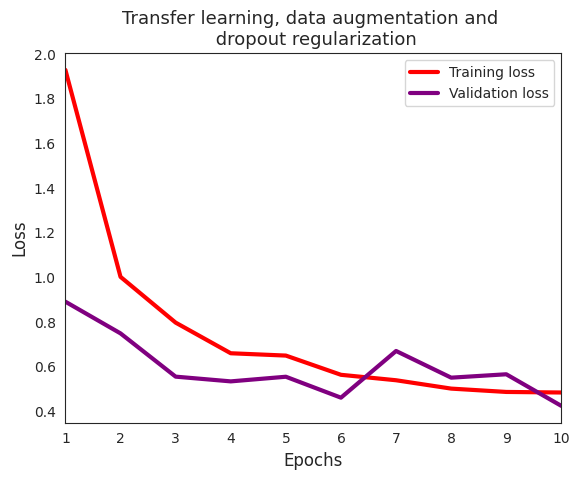

In [11]:
# Loss
sns.set_style('white')
sns.lineplot(x=range(1, len(his_vgg2.history['loss']) + 1), y = his_vgg2.history['loss'],
             label='Training loss', linewidth=3, color = 'red')
sns.lineplot(x=range(1, len(his_vgg2.history['val_loss']) + 1), y = his_vgg2.history['val_loss'],
             label='Validation loss', linewidth=3, color = 'purple')
plt.title("Transfer learning, data augmentation and \n dropout regularization", fontsize=13)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.xlim(1, len(his_vgg2.history['loss']))
plt.legend()
plt.show()